In [ ]:
#problem 3(a)

In [81]:
import pandas as pd
import numpy as np


In [82]:
df=pd.read_csv("hw2_question3.csv")#index_col=9

In [83]:
df.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
feature1    683 non-null int64
feature2    683 non-null int64
feature3    683 non-null int64
feature4    683 non-null int64
feature5    683 non-null int64
feature6    683 non-null int64
feature7    683 non-null int64
feature8    683 non-null int64
feature9    683 non-null int64
Class       683 non-null int64
dtypes: int64(10)
memory usage: 53.4 KB


In [85]:
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [86]:
df.Class.value_counts(2)

2    0.650073
4    0.349927
Name: Class, dtype: float64

In [87]:
x=df.drop('Class', axis=1)
# x.head(5)

In [88]:
y = df['Class']
# y.head(5)

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [90]:
y_train.value_counts(2)

2    0.643326
4    0.356674
Name: Class, dtype: float64

In [91]:
y_test.value_counts(2)

2    0.663717
4    0.336283
Name: Class, dtype: float64

In [92]:
#Problem 3(b):

In [93]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
# from sklearn.model_selection import model
giniTrainingAcc=[]
entropyTrainingAcc=[]

giniAccuracy=[]
entropyAccuracy=[]
skf=StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(x, y):# get train data and test data from original training data
    x_training, x_testing = x.iloc[train_index], x.iloc[test_index]
    y_training, y_testing = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    modelEntropy = tree.DecisionTreeClassifier(criterion ='entropy',max_depth  =10)# criterion ='entropy'
    modelGini = tree.DecisionTreeClassifier(max_depth  =10)#default criterion ='gini'
    modelGini.fit(x_training, y_training)
    modelEntropy.fit(x_training, y_training)
    giniAccuracy.append(modelGini.score(x_testing,y_testing))
    entropyAccuracy.append(modelEntropy.score(x_testing,y_testing))

#     y_train_predict = modelEntropy.predict(x_train)
#     accuracy_score(y_train, y_train_predict)
#     y_train_predict = modelEntropy.predict(x_training)
#     print("accuracy training each fold ",accuracy_score(y_training, y_train_predict))

#     y_test_predict = modelEntropy.predict(x_test)
#     print("entropy accuracy training each fold ",accuracy_score(y_test, y_test_predict))
#     print("gini accuracy training each fold ",accuracy_score(y_test, modelGini.predict(x_test)))
#     print(modelEntropy.score(x_testing,y_testing))
#     print(modelGini.score(x_testing,y_testing))
#     print(modelGini.score(x_training,y_training))
#     print(roc_auc_score(y_training, modelGini.predict(x_training)))
#     print(roc_auc_score(y_testing, modelGini.predict(x_testing)))
    giniTrainingAcc.append(metrics.accuracy_score(y_training, modelGini.predict(x_training)))
    entropyTrainingAcc.append(metrics.accuracy_score(y_training, modelEntropy.predict(x_training)))
print("gini: ",np.mean(giniTrainingAcc))
print("entropy",np.mean(entropyTrainingAcc))
# print("gini: ",np.mean(giniAccuracy))
# print("entropy",np.mean(entropyAccuracy))



gini:  1.0
entropy 0.9996747967479674


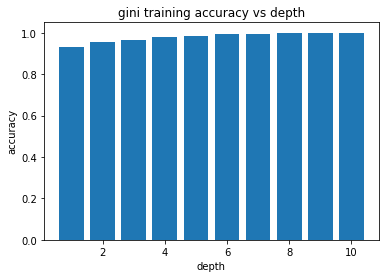

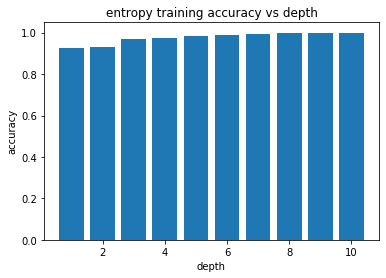

In [94]:
import matplotlib.pyplot as plt
depth=[1,2,3,4,5,6,7,8,9,10]
giniAcc=[0.9295566510764731,0.9546134677536123,0.9656719758618543,0.9772243737698176,0.9850345491483173,0.9923534812424142,0.9957697086288093,0.9991867253267905,0.9995119302984561,0.9998371335504885]
entropyAcc=[0.9274428299382617,0.9297237478233743,0.9669749065981289,0.9746238027484552,0.9837326785658398,0.9895884591296523,0.9952813741037703,0.9985357900355517,0.9983731884095354,0.9996745319244724]
plt.bar(depth,giniAcc)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.title('gini training accuracy vs depth')
plt.show()
plt.bar(depth,entropyAcc)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.title('entropy training accuracy vs depth')
plt.show()

In [95]:
def gini(x,y,n):
    giniAccuracy=[]
    entropyAccuracy=[]
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    for train_index, test_index in skf.split(x, y):# get train data and test data from original training data
        x_training, x_testing = x.iloc[train_index], x.iloc[test_index]
        y_training, y_testing = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        
        modelGini = tree.DecisionTreeClassifier(max_depth =n)#default criterion ='gini'
        modelGini.fit(x_training, y_training)
       
        giniAccuracy.append(modelGini.score(x_testing,y_testing))
    return np.mean(giniAccuracy)
        
def entropy(x,y,n):
    giniAccuracy=[]
    entropyAccuracy=[]
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    for train_index, test_index in skf.split(x, y):# get train data and test data from original training data
        x_training, x_testing = x.iloc[train_index], x.iloc[test_index]
        y_training, y_testing = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        modelEntropy = tree.DecisionTreeClassifier(criterion ='entropy',max_depth =n)# criterion ='entropy'
       
        modelEntropy.fit(x_training, y_training)
#         giniAccuracy.append(modelGini.score(x_testing,y_testing))
        entropyAccuracy.append(modelEntropy.score(x_testing,y_testing))
    return np.mean(entropyAccuracy)

In [96]:
depth=[]
acc=[]
for a in range(1,200):
    depth.append(a)
    acc.append(gini(x,y,a))
# print(gini(x,y,depth))
# plt.plot(depth,acc)
# plt.show()

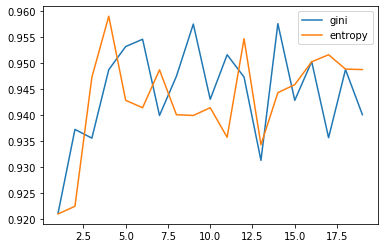

In [97]:
depth=[]
acc=[]
depth1=[]
acc1=[]
for b in range(1,20):
    depth1.append(b)
    acc1.append(entropy(x,y,b))
    depth.append(b)
    acc.append(gini(x,y,b))
# print(entropy(x,y,depth1))
plt.plot(depth,acc,label='gini')
plt.plot(depth1,acc1,label='entropy')
plt.legend()
plt.show()
# print(entropy(x,y,1))

In [98]:
#problem 3(c)

In [99]:
from sklearn.ensemble import RandomForestClassifier
#number of estimator or tree numbers
def randomforest(x,y,n):
    Accuracy=[]
    
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    for train_index, test_index in skf.split(x, y):# get train data and test data from original training data
        x_training, x_testing = x.iloc[train_index], x.iloc[test_index]
        y_training, y_testing = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        clf=RandomForestClassifier(n_estimators=n)#max_depth =m
        clf.fit(x_training,y_training)
        
       
        Accuracy.append(clf.score(x_testing,y_testing))
    return np.mean(Accuracy)
#Create a Gaussian Classifier
def randomforestDepth(x,y,n):
    Accuracy=[]
    
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    for train_index, test_index in skf.split(x, y):# get train data and test data from original training data
        x_training, x_testing = x.iloc[train_index], x.iloc[test_index]
        y_training, y_testing = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        clf=RandomForestClassifier(n_estimators=42,max_depth=n)#max_depth =m
        clf.fit(x_training,y_training)
        
       
        Accuracy.append(clf.score(x_testing,y_testing))
    return np.mean(Accuracy)

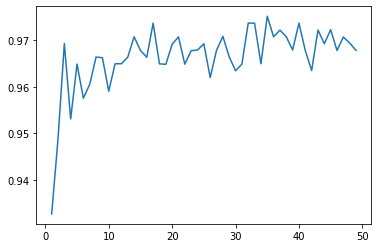

In [100]:
number=[]
acc=[]
# for a in range(1,200):
#     number.append(a)
#     acc.append(randomforest(x,y,a))
# plt.plot(depth,acc,label='random forest')
# plt.show()
for a in range(1,50):
    number.append(a)
    acc.append(randomforest(x,y,a))
#     print(randomforest(x,y,a))
plt.plot(number,acc,label='random forest')
plt.show()

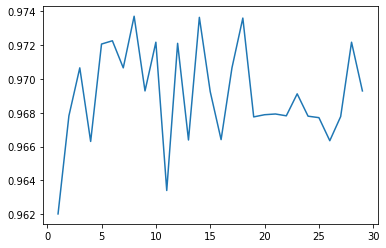

In [101]:
depth=[]
acc1=[]
for a in range(1,30):
    depth.append(a)
    acc1.append(randomforestDepth(x,y,a))
#     print(randomforestDepth(x,y,a))
plt.plot(depth,acc1,label='random forest depth')
plt.show()

In [102]:
Accuracy=[]
    
skf=StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(x, y):# get train data and test data from original training data
    x_training, x_testing = x.iloc[train_index], x.iloc[test_index]
    y_training, y_testing = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    clf=RandomForestClassifier(n_estimators=42,max_depth=3)
    clf.fit(x_training,y_training)
#     feature_importance = clf.feature_importances_
    print(clf.feature_importances_)    
       
    Accuracy.append(clf.score(x_testing,y_testing))
print(np.mean(Accuracy)) 

[0.02843826 0.31527117 0.3323368  0.0247512  0.0672571  0.08694528
 0.09294791 0.04644275 0.00560954]
[0.06374343 0.28109271 0.22770188 0.00944066 0.07780017 0.18131008
 0.05552736 0.10194499 0.00143871]
[0.03534983 0.34768483 0.1752062  0.0262991  0.09439376 0.14048968
 0.1191572  0.05843124 0.00298815]
[0.03775503 0.19235266 0.21341721 0.02644766 0.07477857 0.23987298
 0.13914413 0.07384653 0.00238524]
[0.0242946  0.34127522 0.28594551 0.01043803 0.13825302 0.09530485
 0.07305938 0.02768612 0.00374328]
[0.02267183 0.26323026 0.2320405  0.01043162 0.08540096 0.24626275
 0.1032437  0.03413019 0.00258819]
[0.02083815 0.36049419 0.20369688 0.00231356 0.06477674 0.23462231
 0.07562564 0.03579092 0.0018416 ]
[0.04488614 0.2890412  0.14616123 0.03524398 0.06959917 0.20756028
 0.14446857 0.06154663 0.00149281]
[0.0400549  0.3765894  0.13364368 0.0100585  0.1524836  0.17584574
 0.07213764 0.03648239 0.00270415]
[0.04622065 0.26683182 0.23822731 0.01387007 0.03719809 0.15804561
 0.14546684 0.0

[0.04267401 0.28351855 0.24688894 0.02314009 0.07786273 0.16884456
 0.12125924 0.03185489 0.00395698]


Text(0.5, 1.0, 'feature importance')

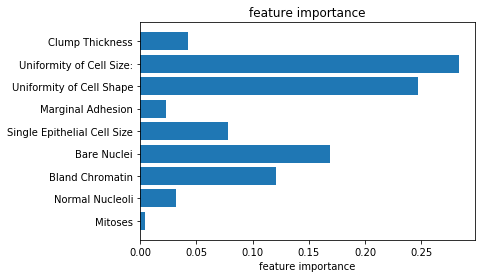

In [57]:
clf=RandomForestClassifier(n_estimators=42,max_depth=3)#max_depth =m
clf.fit(x_training,y_training)
feature_importance = clf.feature_importances_
print(feature_importance)
# print(np.sum(feature_importance))
feature=["Clump Thickness","Uniformity of Cell Size:","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses"]
fig, ax = plt.subplots()
ypos=np.arange(len(feature))
ax.barh(ypos,feature_importance,align='center')
ax.set_yticks(ypos)
ax.set_yticklabels(feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('feature importance')
ax.set_title('feature importance')